## 정규방정식
```
선형회귀문제에서 반복적인 알고리즘 없이 최적의 세타값을 구하는 해석적인 방법
```

$$ \hat{\theta} = (X^tX)^{-1}X^ty $$

### rand, randn 차이
```
np.random.rand 는 0은 들어가고 1은 들어가지 않은 균등분포(각각의 변수가 나올 확률이 같음)에서 추출 , 음수 X
np.random.randn 는 N(0,1), 표준정규분포에서 추출, 음수 O
```

In [3]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)

X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

### add_dummy_feature
```
add_dummy_feature(X) : x0 = 1을 추가함.
```

In [3]:
from sklearn.preprocessing import add_dummy_feature

dataset = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print("Original Dataset:\n", dataset)

new_dataset = add_dummy_feature(dataset)
print("\nDefault dummy value:\n", new_dataset)

Original Dataset:
 [[1. 2. 3.]
 [4. 5. 6.]]

Default dummy value:
 [[1. 1. 2. 3.]
 [1. 4. 5. 6.]]


In [5]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

theta_best

array([[4.21509616],
       [2.77011339]])

## 새로운 데이터 X_new
```
x=0,x=2 일때 세타 이용해서 y값 예측

```

In [5]:
X_new = np.array([[0],[2]])
X_b_new = add_dummy_feature(X_new)
y_predict = X_b_new @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

## 그래프 -, .
```
r- : red + 선
b. : blue + 점
```

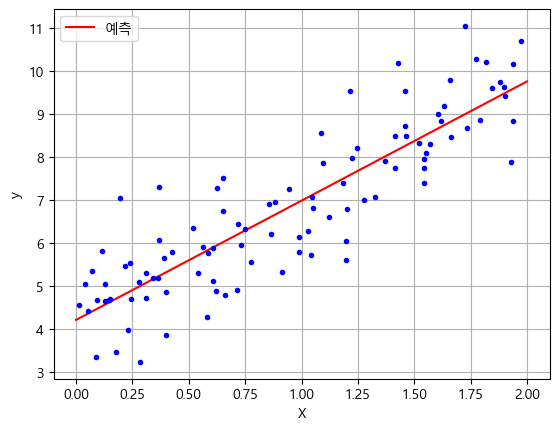

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.plot(X_new, y_predict, "r-", label='예측')
plt.plot(X, y, 'b.')

plt.grid()
plt.legend()
plt.xlabel('X')
plt.ylabel('y')

plt.show()

## 선형회귀
```
세타0 : intercept_ , 세타1 : coef_
```

In [7]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## 세타 불러오는 다른 방법 1
```
scipy.linalg.lstsq() 함수에서 따옴
```

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

## 세타 불러오는 다른 방법 2
```
유사역행렬을 직접 구함
```
$$ \hat{\theta} = X^+y$$

In [10]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## 경사하강법
```
특성 수가 매우 많거나, 훈련 샘플이 많아 메모리에 모두 담을 수 없을 때 적합한 방식

경사하강법의 목표 : 비용함수 최소화, 하산할 때 기울기가 가파를수록 빨리 내려감.

세타를 임의의 값으로 시작해서 한번에 조금씩 비용함수(ex. MSE)가 감소되는 방향으로 진행하여 알고리즘이 최솟값에 수렴할 때 까지 진행
```

## 학습 스텝
```
경사하강법에서 중요한 파라미터는 스텝의 크기임.
학습률 하이퍼파라미터로 조정됨.

학습률이 작으면 최솟값 도달까지 시간이 오래 걸림.

학습률이 크면 세타값을 넘어 더 경사값이 올라 갈수도 있음.

적절한 학습률 중요
```


## 경사하강법 사용 조건
```
반드시 모든 특성의 스케일을 같게 만들어야함.

시간 줄이기 위해
```

![경사하강법 스텝](./datasets/gd.png)

## 배치 경사 하강법
```
매 스텝마다 전체 데이터를 모두 사용해서 시간이 오래 걸림
```

## 비용 함수의 그레이디언트 벡터
$$ \frac{2}{m} X^t(X\theta - y)$$

In [11]:
eta = 0.1 # 학습률
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    
theta

array([[4.21509616],
       [2.77011339]])

## 확률적 경사 하강법
```
매 스텝마다 데이터 전체가 아닌 한 개의 샘플을 랜덤 선택해서 진행

학습률을 점진적으로 줄여나가는 것(학습 스케쥴)이 지역 최솟값으로 빠지는 것을 방지 가능
```

## 그레디언트 벡터
$$ 2 X^t(X\theta - y)$$

In [12]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradient = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradient
        
theta

array([[4.21076011],
       [2.74856079]])

## SGDRegressor
```
max_iter : 최대 학습 수
tol : 허용 오차, 그 값까지 허용
eta0 : 학습률
n_iter_no_change : 숫자만큼 세타 값이 바뀌지 않는 다면 스탑
```

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)

sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [14]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## 미니 배치 경사 하강법
```
미니배치라 부르는 임의의 작은 샘플 세트에 대한 그레이디언트 계산함.

행렬 연산에 최적화된 하드웨어, GPU를 사용해 성능 향상 가능
```

## 다항 회귀
```
비선형 데이터를 학습하는데 사용하는 선형모델

각 특성의 거듭제곱을 새로운 특성으로 추가하고 선형 모델을 훈련시킴.
```

In [15]:
np.random.seed(42)
m = 100
X = 6 * np.random.randn(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m,1) # 노이즈(잡음)

## PolynomialFeatures
```
degree : 다항식 차수 (2차방정식인지, 몇차 인지)
```

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0]

array([-0.01971508])

In [17]:
X_poly[0]

array([-0.01971508,  0.00038868])

## intercept_, coef_
```
ex) 2차다항식일때 reg.intercept_ : array[c], reg.coef_ : array[b,a]

ax ^2 + bx + c
```

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.87009469]), array([[1.01811444, 0.50512305]]))

## 학습 곡선
```
과대적합 또는 과소적합 체크하기 위한 곡선 
```

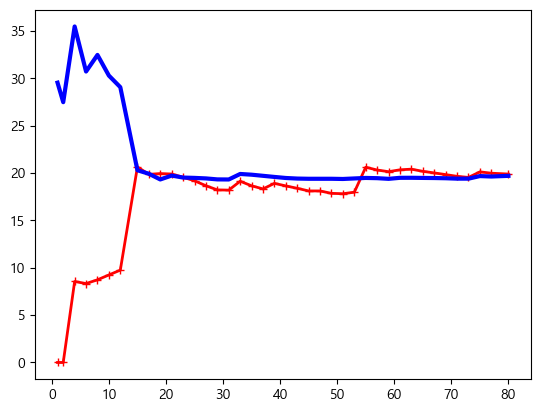

In [21]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01,1,40),  # np.linspace(0.01,1,40) : 0.01~ 1 까지 40등분 
    cv=5, scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="훈련 세트")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="검증 세트")

plt.show()

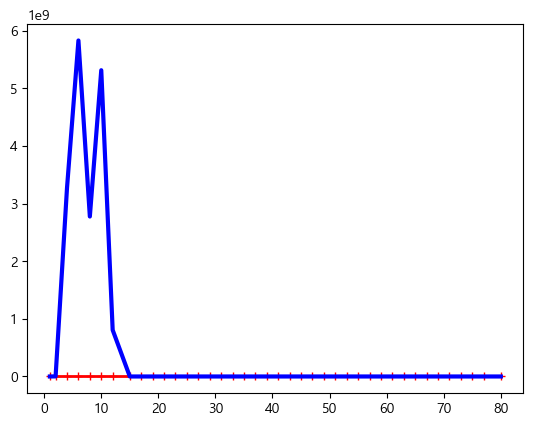

In [24]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error')

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="훈련 세트")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="검증 세트")

plt.show()

## 릿지 함수

$$ J(\theta) = MSE(\theta) + \frac{\alpha}{m}$$


In [26]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[3.66585975]])

In [27]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.08748715])

## 라쏘 회귀
```
덜 중요한 특성의 가중치를 제거하려고 함.
```

In [28]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([3.68274416])

## 엘라스틱넷 회귀

In [29]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([3.70117552])

In [31]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

## 로지스틱 회귀

In [33]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

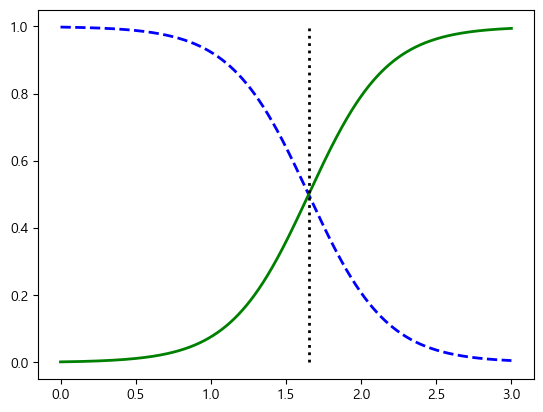

In [38]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0,0]

plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Iris-Virginica가 아닐 확률")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica일 확률")
plt.plot([decision_boundary, decision_boundary], [0,1], 'k:', linewidth=2,
         label='결정 경계')
plt.show()

## 소프트맥스 회귀

In [40]:
X =iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [42]:
softmax_reg.predict([[5,2]])

array([2])

In [43]:
softmax_reg.predict_proba([[5,2]]).round(2)

array([[0.  , 0.04, 0.96]])